# Data Science with Pokémon - Study Case (in progress)

### By Guilherme Ceratti Ramos

    This Notebook is meant to be a personal study in order for me to learn Data Science. The subject has been chosen for a few reasons:
    
        1) The Dataset doesn't contain an extremely large number of columns and rows, but just enough so that I can begin my training with a small Data Science project;
        
        2) I like the subject. Once a college professor told me that studying with subjects we enjoy is very helpful in the beginning to keep us motivated;
        
        3) The way this subject can be utilized. Pokémon have a lot of different status and types. It's the perfect example for training a clusterization or classification algorithm, altought virtually any model can be applied.
        

### Question to be answered during this study:
    
        1) Is it possible to build a classifier to identify Legendary Pokémon?
        2) How do height and weight of a Pokemón correlate with it's status?
        3) Which factors influentiate Experience Growth and Egg Steps? Are these quantities correlated?
        4) Which type is stronger, overall? And which is weakest?
        5) Which type has higher probability of being a Legendary Pokémon?
        
        [CHALLENGE] Is it possible to build a Pokémon "dream team"? A team of 6 Pokémon that inflicts the most damage while still being strong agains another team of 6 Pokémon?

## Imports and preparations

In [1]:
#!pip install requests
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!python -m pip install -U matplotlib
#!pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
filepath = os.path.abspath('pokemon.csv')

In [5]:

df = pd.read_csv(filepath)
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [7]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

Ok, let's take a look at the data.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Since our first goal is to classify legendary Pokémon, we'll now plot the data in order to compare the amount of normal Pokémon to Legendary Pokémon.

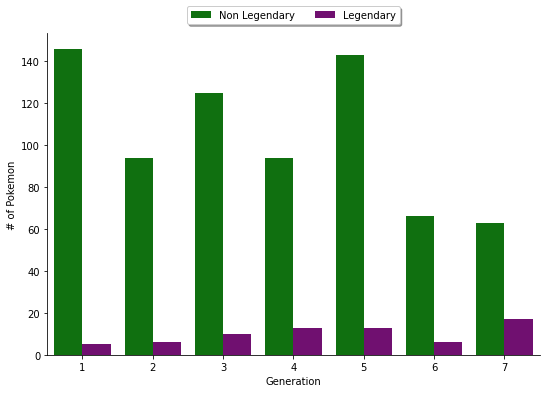

In [9]:
colors = ['green', 'purple']
g = sns.catplot(        # Categorical plot
    x='generation',     # Column for X-Axis
    data=df,            # Data for the plot
    kind='count',       # Different kinds of plot types. A bit tricky to understand.
    hue='is_legendary', # Column that diferentiates the data to be analyzed 
    palette=colors,     # Defines color palette, obviously
    height=5,           # Plot image size
    aspect=1.5,         # Bar size
    legend=False,       # Legend at the side of the plot. Looks better the way it's done below.
    ).set_axis_labels('Generation', '# of Pokemon') # Kinda self-explanatory

# This is the legend config. It's mostly self-explanatory.
g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=True, ncol=2, labels=['Non Legendary', 'Legendary'])
plt.show()

Later gens seem to have more Legendary Pokemon than the previous one, but that doesn't tell us much.
We must find out if there are any common features/traits that that the Legendary Pokémon have.

We know Legendary Pokemon are supposed to be "rare" and "powerful". The attributes that reflect these qualities may give us better insight as to how we can predict what is a legendary Pokemon.

Because Legendary Pokemon are "rare", capturing them should be tougher than catching non-legendary Pokemon. Let's take a look at the capture_rate feature and plot it.

C:\Users\guilh\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\guilh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\guilh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='is_legendary', ylabel='capture_rate'>

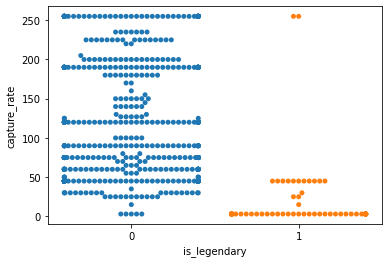

In [10]:
df_capture_rate = df.copy()
df_capture_rate.capture_rate.iloc[773] = 225   # The data in this specific row isn't numeric. Probably an error in the extraction process.
df_capture_rate.capture_rate = pd.to_numeric(df_capture_rate.capture_rate) # We have to transform the data from Object to Numeric in order to swarmplot it.

sns.swarmplot(
    x=df_capture_rate['is_legendary'],
    y=df_capture_rate['capture_rate'],
    size=5
    )

As expected, the capture rate of legendary Pokemon is significantly lower than their non-legendary counterparts. Now, because legendary Pokemon are also meant to be "extremely powerful", we must check their base stats to confirm that they are stronger than their non-legendary counterparts.

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='is_legendary', ylabel='base_total'>

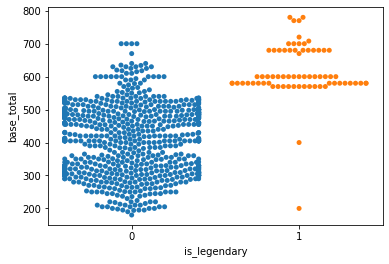

In [11]:
sns.swarmplot(x=df['is_legendary'],
             y=df['base_total'])

Great! As expected, most legendary Pokemon have very strong base stats.

Now, using these two qualities, we can come up with the following plot:

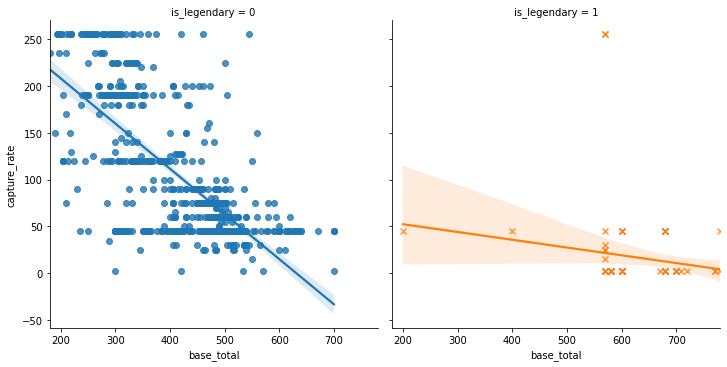

In [12]:
df_capture_rate['capture_rate'].sort_values()
sns.lmplot(x="base_total",
           y="capture_rate",
           hue="is_legendary",
           markers=['o', 'x'],    # Set custom markers for each group in the hue property
           col="is_legendary",    # This allows for the separation of the plots
           data=df_capture_rate)

This is a linear model plot, AKA lmplot. It shows the correlation between data in a linear way, with the 'hue' property acting as a separator between these models. If the hue property isn't set, then the plot will create the linear model taking all the data into consideration.

The lmbplot is a very powerful tool that allows us to build different kinds of models and use a big variety of properties to manipulate data.

Ok, let's proceed a bit further now. Capture_rate and base_stats were useful to confirm our guesses, but not enough to create a predictive model. We will also use some other features for this. Experience growth might tell us more. Let's check that.

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\guilh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='is_legendary', ylabel='experience_growth'>

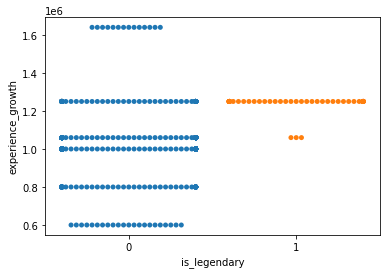

In [13]:
sns.swarmplot(x=df['is_legendary'],
             y=df['experience_growth'])

A surprise, to be sure. Experience growth does not seem to be a very strong feature of legendaries. Although, they do posses mostly the same growth rate. That might come in handy in the future.

## Processing the data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

All the features seem to vary in data types, so we will preprocess the ones that may give us better insight in predicting legendaries. Here's the ones we'll use for this model:

In [15]:
pkm_mfeatures = ['percentage_male', 'type1', 'type2', 'height_m', 'weight_kg',
                 'experience_growth', 'hp', 'attack', 'base_total',
                 'defense', 'sp_attack', 'sp_defense', 'speed', 'capture_rate'] 

# I don't think percentage_male is useful since legendaries usually don't have a gender. But I'll look into it later.

print(pkm_mfeatures)

pkm_mval = df[pkm_mfeatures]
x = pd.DataFrame(pkm_mval)

# Setting the target data
y = df.is_legendary

['percentage_male', 'type1', 'type2', 'height_m', 'weight_kg', 'experience_growth', 'hp', 'attack', 'base_total', 'defense', 'sp_attack', 'sp_defense', 'speed', 'capture_rate']


### Dealing with null values
Currently, there are three columns that contain null values

In [16]:
# Returning all columns with the amount of null values in each column
x.isnull().sum()

percentage_male       98
type1                  0
type2                384
height_m              20
weight_kg             20
experience_growth      0
hp                     0
attack                 0
base_total             0
defense                0
sp_attack              0
sp_defense             0
speed                  0
capture_rate           0
dtype: int64

###### Types
Pokemon have special characteristics, such as types that make them unique. For example, if their species is based off of an aquatic mammal, their type would be considered water. Many species have more than one type, as shown below.

In [17]:
x[x['type2'] != 'None'].groupby(['type1', 'type2']).size()

type1  type2   
bug    electric     4
       fairy        2
       fighting     3
       fire         2
       flying      13
                   ..
water  ice          3
       poison       3
       psychic      5
       rock         4
       steel        1
Length: 148, dtype: int64

In [18]:
x[x['type2'] != 'None'].groupby(['type1', 'type2']).size().unstack()

type2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
type1,,,,,,,,,,,,,,,,,,
bug,NaN,NaN,NaN,4.0,2.0,3.0,2.0,13.0,1.0,6.0,1.0,NaN,NaN,11.0,NaN,3.0,5.0,3.0
dark,NaN,NaN,4.0,NaN,NaN,2.0,2.0,5.0,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN
dragon,NaN,NaN,NaN,1.0,NaN,2.0,1.0,4.0,NaN,NaN,4.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN
electric,NaN,NaN,NaN,1.0,2.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN
fairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fighting,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0,NaN
fire,NaN,1.0,1.0,NaN,NaN,6.0,1.0,6.0,NaN,NaN,2.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0
flying,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ghost,NaN,1.0,1.0,NaN,1.0,NaN,3.0,2.0,NaN,5.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN


Because there are species that one contain one type, we will set their type2 NaN values to 'None'.

In [19]:
x['type2'].fillna('None', inplace=True)
x['percentage_male'].fillna(0, inplace=True)

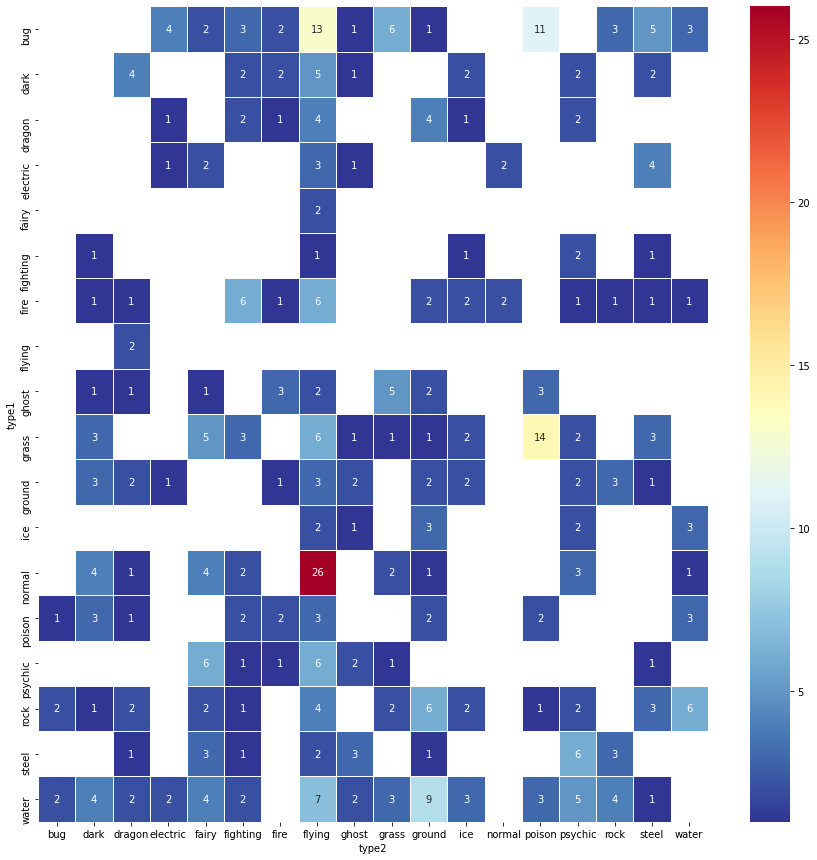

In [20]:
plt.subplots(figsize=(15, 15))
sns.heatmap(
    # Select records where type_2 isn't null, then group by types
    # The .size() method computes the size of groups, e.g. there's 26 occurances of Pokemon with the 'Normal' and 'Flying' types
    # The .unstack() method is self-explanatory, the examples above might help to understand it
    x[x['type2'] != 'None'].groupby(['type1', 'type2']).size().unstack(),
    linewidths = 1,
    annot = True,        # Puts the values in each square
    cmap = 'RdYlBu_r'    #Color
)

plt.show()

##### Height and Weight
For these null values, I will use the SimpleImputer function below.

## Random Forest Model
We will utilize a RFModel with a pipeline implementation.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

Now we will separate the training and testing data. 80% of the data will be used in training and the remaining 20% will be for evaluation of the model.

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

We need to separate our data columns, since the nature of their data is different.

In [23]:
# Select categorical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == 'object']
print(categorical_cols)

['type1', 'type2', 'capture_rate']


In [24]:
# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
print(numerical_cols)

['percentage_male', 'height_m', 'weight_kg', 'experience_growth', 'hp', 'attack', 'base_total', 'defense', 'sp_attack', 'sp_defense', 'speed']


In [25]:
# Preprocessing the numerical data
numerical_transform = SimpleImputer(strategy='mean')   # Fills the None values with the mean of the other values in the column

In [27]:
# Preprocessing the categorical transform
# The Pipeline is a series of transforms with a final estimator
# For more details check https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

# So what is happening here is that our categorical data preprocessing pipeline has two steps to follow
# First, we will impute the most frequent value into the missing values
# Then, we will use OneHotEncoder to transform each row of categorical values into a numeric array
# Basically, it encodes different categorical values into a number and encodes it into an array
# with other categorical values from a certain row
# E.g.: [0, 1, 1] could mean a certain Pokemon's type1 is 'bug', type2 is 'flying', classification is 'Poison bee'
# while [5, 1, 4] could mean another Pokemon's type1 is 'fairy', type2 is 'flying' and classification is 'Balloon'

categorical_transform = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [29]:
# Bundling the preprocessing transformers
# This is responsible for applying the transforms into the data
# transformers prop receives a list of tuples (name, transformer, columns)
preprocessor = ColumnTransformer(transformers = [('num', numerical_transform, numerical_cols),
                                                 ('cat', categorical_transform, categorical_cols)])

In [30]:
# Define models
# Study this model more in depth later
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

In [31]:
# Combine preprocesser with model in a pipeline
# Basically what is happening here is that we are creating a final pipeline to connect the preprocessor for the data
# And the RF model
p1 = Pipeline(steps=[('preprocessorrf', preprocessor), ('modelrf', rf_model)])

In [33]:
# Preprocess of training data, fit the model
# This prints a very nice view of the connected pipelines
p1.fit(X_train, y_train)

Pipeline(steps=[('preprocessorrf',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['percentage_male',
                                                   'height_m', 'weight_kg',
                                                   'experience_growth', 'hp',
                                                   'attack', 'base_total',
                                                   'defense', 'sp_attack',
                                                   'sp_defense', 'speed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
          

In [34]:
# Process validation data, obtain predictions
p1pred = p1.predict(X_valid)

In [35]:
preds1 = df.index[p1pred]

In [36]:
pd.crosstab(y_valid, preds1, rownames=['Actual Legendary'], colnames=['Predicted Legendary'])

Predicted Legendary,0,1
Actual Legendary,,
0,145,1
1,6,9


In [37]:
print('Model Accuracy: ', (154/161)*100)

Model Accuracy:  95.65217391304348


Although the accuracy as a whole had a decent result, the accuracy in which it predicted legendaries was 9/15 which is 60%. There are a few things that I can do that could improve the accuracy. Some of the columns that I had one-hot encoded appeared to have a high cardinality - which may affect the result of my model.

Personal note: I believe certain columns like 'name' or 'pokedex_number' should be taken out. Let's see what this guy does.

Unfortunately the pipeline implementation does not support Label Encoding, so I will have to do it manually.

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [39]:
# Make copy to avoid changing original data
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

UNDERSTAND WHAT IS HAPPENING HERE !!!!!!!!!!!!!

In [40]:
# Apply label encoder to each column with categorical data
# The LabelEncoder, differently from the OneHotEncoder, is responsible for encoding target labels with values between 0 and n-1
# Of course, n being the number of unique labels
# E.g. ["paris", "paris", "tokyo", "amsterdam"] = [1, 1, 2, 3]
# le.transform(["tokyo", "tokyo", "paris"]) = [2, 2, 1]

# In this case, this is useful because of the high cardinality within the data

label_encoder = LabelEncoder()
for col in categorical_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col]) #Fit label encoder and return encoded labels.
    label_X_valid[col] = label_encoder.transform(X_valid[col]) #Transform labels to normalized encoding.
    
# I managed to grasp a lot of concepts with these lines of code, but I still need to study more the 'normalized encoding'

In [41]:
label_X_train

,percentage_male,type1,type2,height_m,weight_kg,experience_growth,hp,attack,base_total,defense,sp_attack,sp_defense,speed,capture_rate
364,50.0,11,18,1.4,150.6,1059860,110,80,530,90,95,90,65,25
458,50.0,9,12,1.0,50.5,1250000,60,62,334,50,62,60,40,1
76,50.0,6,0,1.0,30.0,1000000,50,85,410,55,65,65,90,13
64,75.4,14,0,1.5,48.0,1059860,55,50,600,65,175,105,150,26
638,0.0,15,6,1.9,260.0,1250000,91,129,580,90,72,90,108,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,24.6,4,0,0.1,0.3,800000,51,52,485,90,82,110,100,28
192,50.0,0,8,1.2,38.0,1000000,65,65,390,45,75,45,95,31
629,0.0,1,8,1.2,39.5,1250000,110,65,510,105,55,95,80,28
559,50.0,1,6,1.1,30.0,1000000,65,90,488,115,45,115,58,33


In [42]:
# Imputation
imputed_X_train = pd.DataFrame(numerical_transform.fit_transform(label_X_train))
imputed_X_valid = pd.DataFrame(numerical_transform.transform(label_X_valid))

# Ok so here the features are transformed to numbers but I don't really get why as they were already numbers

In [43]:
# Imputation removed column names, put them back
imputed_X_train.columns = label_X_train.columns
imputed_X_valid.columns = label_X_valid.columns

In [44]:
imputed_X_train

,percentage_male,type1,type2,height_m,weight_kg,experience_growth,hp,attack,base_total,defense,sp_attack,sp_defense,speed,capture_rate
0,50.0,11.0,18.0,1.4,150.6,1059860.0,110.0,80.0,530.0,90.0,95.0,90.0,65.0,25.0
1,50.0,9.0,12.0,1.0,50.5,1250000.0,60.0,62.0,334.0,50.0,62.0,60.0,40.0,1.0
2,50.0,6.0,0.0,1.0,30.0,1000000.0,50.0,85.0,410.0,55.0,65.0,65.0,90.0,13.0
3,75.4,14.0,0.0,1.5,48.0,1059860.0,55.0,50.0,600.0,65.0,175.0,105.0,150.0,26.0
4,0.0,15.0,6.0,1.9,260.0,1250000.0,91.0,129.0,580.0,90.0,72.0,90.0,108.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,24.6,4.0,0.0,0.1,0.3,800000.0,51.0,52.0,485.0,90.0,82.0,110.0,100.0,28.0
636,50.0,0.0,8.0,1.2,38.0,1000000.0,65.0,65.0,390.0,45.0,75.0,45.0,95.0,31.0
637,0.0,1.0,8.0,1.2,39.5,1250000.0,110.0,65.0,510.0,105.0,55.0,95.0,80.0,28.0
638,50.0,1.0,6.0,1.1,30.0,1000000.0,65.0,90.0,488.0,115.0,45.0,115.0,58.0,33.0


In [46]:
# Using RandomForest Model
rf_model.fit(imputed_X_train, y_train) # Training model

rf_preds = rf_model.predict(imputed_X_valid) # Predicting with model
visualizerf = x.index[rf_preds] # Predicted columns (I think)

pd.crosstab(y_valid, visualizerf, rownames=['Actual Legendary'], colnames=['Predicted Legendary'])

Predicted Legendary,0,1
Actual Legendary,,
0,145,1
1,3,12


In [47]:
print('Model 2 accuracy: ', (157/161)*100)
print('Model 2 accuracy for predicting legendaries: ', (12/15)*100)

Model 2 accuracy:  97.51552795031056
Model 2 accuracy for predicting legendaries:  80.0


There was an increase in precision with this model's predictions: an 80% accuracy in classifying legendary Pokemon (without utilizing a pipeline implementation + one hot encoding).

### Gradient Boosting Model
Let's try this one. Study how it works first.

My stuff:

First, let's cut out the columns we already know won't be of use to us.

In [ ]:
df.drop('japanese_name', axis=1, inplace=True)
df.columns

I think whe should now normalize the data, for instance "against" type columns and "sp_attack" are both numerical, however they have very different meanings and measures. Need to figure this out.

In [ ]:
df['classfication'][:50]